In [1]:
import geopandas as gpd
import oggm
import os
from oggm import cfg, tasks, graphics
from oggm.utils import get_demo_file

In [2]:
import sys
sys.executable

'/home/david/anaconda3/envs/oggm_env/bin/python'

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import xarray as xr
import shapely.geometry as shpg
plt.rcParams['figure.figsize'] = (8,8)

In [6]:
glacier_num = 1

In [7]:
cfg.initialize()
cfg.PARAMS['continue_on_error'] = True

2018-09-06 16:56:14: oggm.cfg: Parameter file: /home/david/oggm/oggm/params.cfg


In [8]:
utils.get_wgms_files()
utils.get_glathida_file()
utils.get_rgi_dir()

'/home/david/OGGM/rgi/RGIV50'

In [13]:
cfg.PATHS

PathOrderedDict([('dl_cache_dir', '/home/david/OGGM/download_cache'),
                 ('tmp_dir', '/home/david/OGGM/tmp'),
                 ('cru_dir', '/home/david/OGGM/cru'),
                 ('rgi_dir', '/home/david/OGGM/rgi'),
                 ('test_dir', '/home/david/OGGM/tests'),
                 ('working_dir', ''),
                 ('dem_file', ''),
                 ('climate_file', '')])

In [14]:
cfg.PATHS['working_dir'] = "/home/david/OGGM_WORKING_DIRECTORY/"

In [10]:
entity = gpd.GeoDataFrame.from_file('/home/david/OGGM/rgi/RGIV5/06_rgi50_Iceland/06_rgi50_Iceland.shp')

In [11]:
entity

,RGIId,GLIMSId,RGIFlag,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,GlacType,Name,geometry
0,RGI50-06.00001,G336215E64817N,0909,20020928,20020928,-23.7852,64.8174,6,0,4.903,624,1406,900,15.0,339,3412,0099,À,"POLYGON ((-23.759735989 64.82046201100002, -23..."
1,RGI50-06.00002,G336231E64795N,0909,20020928,20020928,-23.7686,64.7951,6,0,1.897,750,1394,1132,17.7,134,1823,1099,À,"POLYGON ((-23.749692765 64.794899657, -23.7498..."
2,RGI50-06.00003,G336196E64798N,0909,20020928,20020928,-23.8043,64.7979,6,0,0.751,827,1410,1093,22.8,269,1244,0099,À,"POLYGON ((-23.785733547 64.799140263, -23.7864..."
3,RGI50-06.00004,G336179E64804N,0909,20020928,-9999999,-23.8210,64.8036,6,0,0.067,830,950,877,17.8,257,334,0099,À,"POLYGON ((-23.818028788 64.80468219000001, -23..."
4,RGI50-06.00005,G336201E64805N,0909,20020928,20020928,-23.7993,64.8046,6,0,0.978,923,1406,1140,16.1,319,1960,0099,À,POLYGON ((-23.77991730999999 64.80141159999999...
5,RGI50-06.00006,G336247E64800N,0909,20020928,20020928,-23.7530,64.8003,6,0,0.912,765,1339,1044,17.3,106,2009,0099,À,"POLYGON ((-23.758258643 64.804338427, -23.7582..."
6,RGI50-06.00007,G336248E64812N,0909,20020928,20020928,-23.7522,64.8116,6,0,2.712,698,1325,961,15.7,71,2423,0099,À,"POLYGON ((-23.758258643 64.804338427, -23.7596..."
7,RGI50-06.00008,G341458E65405N,0909,20009999,-9999999,-18.5420,65.4045,6,0,2.166,914,1218,1072,13.6,44,1995,0099,À,"POLYGON ((-18.543805135 65.406850675, -18.5422..."
8,RGI50-06.00009,G341697E65639N,0909,20009999,-9999999,-18.3031,65.6388,6,0,0.448,1122,1420,1249,19.2,73,902,0099,À,"POLYGON ((-18.294609512 65.636673968, -18.2946..."
9,RGI50-06.00010,G341706E65650N,0909,20009999,-9999999,-18.2939,65.6495,6,0,1.000,1061,1347,1171,15.2,9,1503,0099,À,"POLYGON ((-18.297313187 65.642731208, -18.2975..."


In [15]:
gdirs = oggm.workflow.init_glacier_regions(entity)

2018-09-06 16:57:42: oggm.workflow: Multiprocessing: using all available processors (N=12)
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00001) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00003) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00006) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00002) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00004) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00012) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00007) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00005) glacier_masks
/home/david/anaconda3/envs/oggm_env/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/david/anaconda3/envs

/home/david/anaconda3/envs/oggm_env/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/david/anaconda3/envs/oggm_env/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00014) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00013) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00015) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00016) glacier_masks
2018-09-06 16:57:51: oggm.core.gis: (RGI50-06.00017) glaci

2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00126) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00122) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00128) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00129) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00131) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00133) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00132) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00134) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00130) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00136) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00137) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00135) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00138) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00140) glacier_masks
2018-09-06 16:57:52: oggm.core.gis: (RGI50-06.00141) glacier_m

2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00247) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00251) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00252) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00250) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00254) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00255) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00253) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00256) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00257) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00258) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00259) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00260) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00261) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00263) glacier_masks
2018-09-06 16:57:53: oggm.core.gis: (RGI50-06.00264) glacier_m

2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00373) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00371) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00374) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00376) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00377) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00378) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00375) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00379) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00380) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00382) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00383) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00384) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00381) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00386) glacier_masks
2018-09-06 16:57:54: oggm.core.gis: (RGI50-06.00385) glacier_m

2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00495) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00496) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00497) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00498) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00499) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00500) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00501) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00502) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00503) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00504) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00507) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00505) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00508) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00506) glacier_masks
2018-09-06 16:57:55: oggm.core.gis: (RGI50-06.00510) glacier_m

2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00042) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00043) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00044) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00041) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00045) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00046) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00048) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00049) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00050) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00051) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00047) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00053) compute_centerlines
2018-09-06 16:57:56: oggm.co

2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00143) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00145) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00144) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00146) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00148) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00149) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00151) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00147) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00153) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00154) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00156) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00157) compute_centerlines
2018-09-06 16:57:56: oggm.co

2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00243) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00246) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00247) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00248) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00250) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00249) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00251) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00253) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00252) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00256) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00255) compute_centerlines
2018-09-06 16:57:56: oggm.core.centerlines: (RGI50-06.00257) compute_centerlines
2018-09-06 16:57:56: oggm.co

2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00345) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00349) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00348) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00350) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00352) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00351) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00353) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00355) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00354) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00356) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00358) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00361) compute_centerlines
2018-09-06 16:57:57: oggm.co

2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00450) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00451) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00449) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00452) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00453) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00456) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00457) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00458) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00455) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00454) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00460) compute_centerlines
2018-09-06 16:57:57: oggm.core.centerlines: (RGI50-06.00461) compute_centerlines
2018-09-06 16:57:57: oggm.co

2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00551) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00553) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00552) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00554) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00556) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00558) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00557) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00559) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00560) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00555) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00562) compute_centerlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00563) compute_centerlines
2018-09-06 16:57:58: oggm.co

2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00084) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00085) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00086) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00087) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00089) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00088) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00090) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00091) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00092) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00093) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00094) initialize_flowlines
2018-09-06 16:57:58: oggm.core.centerlines: (RGI50-06.00097) initialize_flowlines
2018-09-06 16:57

2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00185) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00181) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00186) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00187) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00189) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00188) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00191) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00190) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00192) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00193) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00194) initialize_flowlines
2018-09-06 16:57:59: oggm.core.centerlines: (RGI50-06.00195) initialize_flowlines
2018-09-06 16:57

2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00285) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00286) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00283) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00287) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00288) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00290) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00289) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00291) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00293) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00292) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00295) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00294) initialize_flowlines
2018-09-06 16:58

2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00385) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00383) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00387) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00388) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00386) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00389) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00390) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00391) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00392) initialize_flowlines
2018-09-06 16:58:00: oggm.core.centerlines: (RGI50-06.00393) initialize_flowlines
2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00395) initialize_flowlines
2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00396) initialize_flowlines
2018-09-06 16:58

2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00483) initialize_flowlines
2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00484) initialize_flowlines
2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00485) initialize_flowlines
2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00487) initialize_flowlines
2018-09-06 16:58:01: oggm.core.centerlines: (RGI50-06.00486) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00488) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00489) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00491) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00492) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00494) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00490) initialize_flowlines
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00495) initialize_flowlines
2018-09-06 16:58

2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00016) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00017) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00015) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00018) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00019) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00021) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00020) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00022) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00025) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00024) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00023) compute_downstream_line
2018-09-06 16:58:02: oggm.core.centerlines: (RGI50-06.00026) comp

2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00113) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00114) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00111) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00115) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00116) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00117) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00118) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00120) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00119) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00121) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00122) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00123) comp

2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00207) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00209) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00211) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00212) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00213) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00214) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00216) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00217) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00218) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00220) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00219) compute_downstream_line
2018-09-06 16:58:03: oggm.core.centerlines: (RGI50-06.00215) comp

2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00307) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00305) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00308) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00309) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00310) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00311) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00312) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00315) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00313) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00316) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00317) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00314) comp

2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00402) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00404) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00406) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00407) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00408) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00405) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00409) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00411) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00410) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00412) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00414) compute_downstream_line
2018-09-06 16:58:04: oggm.core.centerlines: (RGI50-06.00413) comp

2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00500) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00501) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00503) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00502) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00505) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00504) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00506) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00507) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00508) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00509) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00511) compute_downstream_line
2018-09-06 16:58:05: oggm.core.centerlines: (RGI50-06.00512) comp

2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00028) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00029) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00030) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00031) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00032) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00033) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00034) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00035) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00036) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00037) compute_downstream_bedshape
2018-09-06 16:58:06: oggm.core.centerlines: (RGI50-06.00038) compute_downstream_bedshape
2018-09-06 16:58:06: 

2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00121) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00122) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00123) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00124) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00125) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00126) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00127) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00129) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00130) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00128) compute_downstream_bedshape
2018-09-06 16:58:07: oggm.core.centerlines: (RGI50-06.00131) compute_downstream_bedshape
2018-09-06 16:58:07: 

2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00214) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00215) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00216) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00217) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00218) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00219) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00221) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00220) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00223) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00224) compute_downstream_bedshape
2018-09-06 16:58:09: oggm.core.centerlines: (RGI50-06.00222) compute_downstream_bedshape
2018-09-06 16:58:09: 

2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00308) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00306) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00309) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00310) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00311) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00312) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00314) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00313) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00315) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00316) compute_downstream_bedshape
2018-09-06 16:58:10: oggm.core.centerlines: (RGI50-06.00318) compute_downstream_bedshape
2018-09-06 16:58:10: 

2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00401) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00398) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00402) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00403) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00404) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00405) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00406) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00407) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00408) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00409) compute_downstream_bedshape
2018-09-06 16:58:12: oggm.core.centerlines: (RGI50-06.00410) compute_downstream_bedshape
2018-09-06 16:58:12: 

2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00493) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00494) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00495) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00497) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00496) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00498) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00499) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00500) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00501) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00502) compute_downstream_bedshape
2018-09-06 16:58:13: oggm.core.centerlines: (RGI50-06.00503) compute_downstream_bedshape
2018-09-06 16:58:14: 

2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00019) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00021) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00022) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00024) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00025) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00023) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00026) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00028) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00029) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00030) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00032) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00033) catchment_area
2018-09-06 16:58:15: oggm.core.centerlines: (RGI50-06.00027) catchment_area
2018-09-06 1

2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00129) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00124) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00131) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00132) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00133) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00135) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00130) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00134) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00137) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00136) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00138) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00139) catchment_area
2018-09-06 16:58:17: oggm.core.centerlines: (RGI50-06.00140) catchment_area
2018-09-06 1

2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00236) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00237) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00239) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00241) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00238) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00240) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00242) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00243) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00244) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00245) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00246) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00248) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00249) catchment_area
2018-09-06 1

2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00345) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00346) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00343) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00348) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00349) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00350) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00351) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00352) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00347) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00353) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00354) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00355) catchment_area
2018-09-06 16:58:19: oggm.core.centerlines: (RGI50-06.00356) catchment_area
2018-09-06 1

2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00452) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00453) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00455) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00454) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00456) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00457) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00458) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00460) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00461) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00459) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00462) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00463) catchment_area
2018-09-06 16:58:21: oggm.core.centerlines: (RGI50-06.00464) catchment_area
2018-09-06 1

2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00560) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00562) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00561) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00563) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00564) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00565) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00566) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00567) catchment_area
2018-09-06 16:58:23: oggm.core.centerlines: (RGI50-06.00568) catchment_area
2018-09-06 16:58:24: oggm.core.centerlines: (RGI50-06.00005) catchment_intersections
2018-09-06 16:58:24: oggm.core.centerlines: (RGI50-06.00004) catchment_intersections
2018-09-06 16:58:24: oggm.core.centerlines: (RGI50-06.00001) catchment_intersections
2018-09-06 16:58:24: oggm.core.centerlines: (RGI50-06.00003) 

2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00091) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00092) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00089) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00095) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00093) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00094) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00096) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00100) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00101) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00098) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00099) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00102) catc

2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00188) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00187) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00189) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00190) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00191) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00193) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00194) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00196) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00195) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00197) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00192) catchment_intersections
2018-09-06 16:58:25: oggm.core.centerlines: (RGI50-06.00198) catc

2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00285) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00283) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00287) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00288) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00286) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00289) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00290) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00292) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00291) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00293) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00294) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00296) catc

2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00382) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00378) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00383) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00384) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00385) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00386) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00387) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00388) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00390) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00391) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00389) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00393) catc

2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00478) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00479) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00480) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00481) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00482) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00484) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00483) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00486) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00485) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00489) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00488) catchment_intersections
2018-09-06 16:58:26: oggm.core.centerlines: (RGI50-06.00487) catc

2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00008) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00007) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00011) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00009) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00010) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00012) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00013) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00014) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00015) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00016) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00017) catchment_width_geom
2018-09-06 16:58:27: oggm.core.centerlines: (RGI50-06.00018) catchment_width_geom
2018-09-06 16:58

2018-09-06 16:58:29: oggm.core.centerlines: (RGI50-06.00107) catchment_width_geom
2018-09-06 16:58:29: oggm.core.centerlines: (RGI50-06.00108) catchment_width_geom
2018-09-06 16:58:29: oggm.core.centerlines: (RGI50-06.00109) catchment_width_geom
2018-09-06 16:58:29: oggm.core.centerlines: (RGI50-06.00110) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00111) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00113) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00112) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00115) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00114) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00118) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00116) catchment_width_geom
2018-09-06 16:58:30: oggm.core.centerlines: (RGI50-06.00117) catchment_width_geom
2018-09-06 16:58

2018-09-06 16:58:31: oggm.core.centerlines: (RGI50-06.00208) catchment_width_geom
2018-09-06 16:58:31: oggm.core.centerlines: (RGI50-06.00207) catchment_width_geom
2018-09-06 16:58:31: oggm.core.centerlines: (RGI50-06.00209) catchment_width_geom
2018-09-06 16:58:31: oggm.core.centerlines: (RGI50-06.00210) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00211) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00212) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00214) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00213) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00215) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00216) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00217) catchment_width_geom
2018-09-06 16:58:32: oggm.core.centerlines: (RGI50-06.00218) catchment_width_geom
2018-09-06 16:58

2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00307) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00309) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00308) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00310) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00311) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00312) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00313) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00314) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00315) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00316) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00317) catchment_width_geom
2018-09-06 16:58:35: oggm.core.centerlines: (RGI50-06.00318) catchment_width_geom
2018-09-06 16:58

2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00407) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00408) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00409) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00410) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00411) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00412) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00413) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00414) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00415) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00416) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00417) catchment_width_geom
2018-09-06 16:58:39: oggm.core.centerlines: (RGI50-06.00418) catchment_width_geom
2018-09-06 16:58

2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00507) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00508) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00509) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00510) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00511) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00512) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00513) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00514) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00515) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00516) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00517) catchment_width_geom
2018-09-06 16:58:44: oggm.core.centerlines: (RGI50-06.00518) catchment_width_geom
2018-09-06 16:58

2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00039) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00040) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00037) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00042) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00041) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00036) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00044) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00045) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00046) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00047) catchment_width_correction
2018-09-06 16:58:46: oggm.core.centerlines: (RGI50-06.00048) catchment_width_correction
2018-09-06 16:58:46: oggm.core.c

2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00131) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00132) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00133) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00135) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00137) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00138) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00136) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00134) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00140) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00139) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00141) catchment_width_correction
2018-09-06 16:58:47: oggm.core.c

2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00216) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00228) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00231) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00227) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00232) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00226) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00229) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00233) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00235) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00236) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00237) catchment_width_correction
2018-09-06 16:58:47: oggm.core.c

2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00313) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00314) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00321) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00324) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00325) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00326) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00327) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00328) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00323) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00329) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00322) catchment_width_correction
2018-09-06 16:58:47: oggm.core.c

2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00414) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00406) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00417) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00415) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00418) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00419) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00420) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00421) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00423) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00416) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00422) catchment_width_correction
2018-09-06 16:58:47: oggm.core.c

2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00506) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00499) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00507) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00508) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00509) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00511) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00512) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00513) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00510) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00514) catchment_width_correction
2018-09-06 16:58:47: oggm.core.centerlines: (RGI50-06.00515) catchment_width_correction
2018-09-06 16:58:47: oggm.core.c

2018-09-06 16:59:25: oggm.core.climate: (RGI50-06.00036) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00037) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00039) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00038) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00040) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00041) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00042) process_cru_data
2018-09-06 16:59:27: oggm.core.climate: (RGI50-06.00043) process_cru_data
2018-09-06 16:59:28: oggm.core.climate: (RGI50-06.00045) process_cru_data
2018-09-06 16:59:28: oggm.core.climate: (RGI50-06.00044) process_cru_data
2018-09-06 16:59:28: oggm.core.climate: (RGI50-06.00046) process_cru_data
2018-09-06 16:59:28: oggm.core.climate: (RGI50-06.00047) process_cru_data
2018-09-06 16:59:28: oggm.core.climate: (RGI50-06.00048) process_cru_data
2018-09-06 16:59:29: oggm.core.climate

2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00147) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00148) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00149) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00150) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00151) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00152) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00153) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00154) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00155) process_cru_data
2018-09-06 16:59:47: oggm.core.climate: (RGI50-06.00156) process_cru_data
2018-09-06 16:59:48: oggm.core.climate: (RGI50-06.00157) process_cru_data
2018-09-06 16:59:49: oggm.core.climate: (RGI50-06.00158) process_cru_data
2018-09-06 16:59:49: oggm.core.climate: (RGI50-06.00159) process_cru_data
2018-09-06 16:59:49: oggm.core.climate

2018-09-06 17:00:06: oggm.core.climate: (RGI50-06.00259) process_cru_data
2018-09-06 17:00:06: oggm.core.climate: (RGI50-06.00260) process_cru_data
2018-09-06 17:00:06: oggm.core.climate: (RGI50-06.00261) process_cru_data
2018-09-06 17:00:06: oggm.core.climate: (RGI50-06.00262) process_cru_data
2018-09-06 17:00:07: oggm.core.climate: (RGI50-06.00263) process_cru_data
2018-09-06 17:00:07: oggm.core.climate: (RGI50-06.00264) process_cru_data
2018-09-06 17:00:07: oggm.core.climate: (RGI50-06.00265) process_cru_data
2018-09-06 17:00:07: oggm.core.climate: (RGI50-06.00266) process_cru_data
2018-09-06 17:00:07: oggm.core.climate: (RGI50-06.00267) process_cru_data
2018-09-06 17:00:08: oggm.core.climate: (RGI50-06.00268) process_cru_data
2018-09-06 17:00:08: oggm.core.climate: (RGI50-06.00269) process_cru_data
2018-09-06 17:00:08: oggm.core.climate: (RGI50-06.00270) process_cru_data
2018-09-06 17:00:08: oggm.core.climate: (RGI50-06.00271) process_cru_data
2018-09-06 17:00:08: oggm.core.climate

2018-09-06 17:00:26: oggm.core.climate: (RGI50-06.00370) process_cru_data
2018-09-06 17:00:26: oggm.core.climate: (RGI50-06.00371) process_cru_data
2018-09-06 17:00:26: oggm.core.climate: (RGI50-06.00372) process_cru_data
2018-09-06 17:00:26: oggm.core.climate: (RGI50-06.00373) process_cru_data
2018-09-06 17:00:26: oggm.core.climate: (RGI50-06.00374) process_cru_data
2018-09-06 17:00:27: oggm.core.climate: (RGI50-06.00375) process_cru_data
2018-09-06 17:00:27: oggm.core.climate: (RGI50-06.00376) process_cru_data
2018-09-06 17:00:27: oggm.core.climate: (RGI50-06.00377) process_cru_data
2018-09-06 17:00:27: oggm.core.climate: (RGI50-06.00378) process_cru_data
2018-09-06 17:00:27: oggm.core.climate: (RGI50-06.00379) process_cru_data
2018-09-06 17:00:28: oggm.core.climate: (RGI50-06.00380) process_cru_data
2018-09-06 17:00:28: oggm.core.climate: (RGI50-06.00381) process_cru_data
2018-09-06 17:00:28: oggm.core.climate: (RGI50-06.00382) process_cru_data
2018-09-06 17:00:28: oggm.core.climate

2018-09-06 17:00:46: oggm.core.climate: (RGI50-06.00481) process_cru_data
2018-09-06 17:00:46: oggm.core.climate: (RGI50-06.00482) process_cru_data
2018-09-06 17:00:46: oggm.core.climate: (RGI50-06.00483) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00484) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00485) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00486) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00487) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00488) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00489) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00490) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00491) process_cru_data
2018-09-06 17:00:47: oggm.core.climate: (RGI50-06.00492) process_cru_data
2018-09-06 17:00:48: oggm.core.climate: (RGI50-06.00493) process_cru_data
2018-09-06 17:00:48: oggm.core.climate

2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00003) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00013) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00016) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00014) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00015) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00017) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00019) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00014) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00016) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00018) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00013) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00015) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00020) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI5

2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00064) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00068) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00070) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00071) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00069) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00070) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00071) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00067) local mu* for t*=1976
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00073) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00075) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00074) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00076) local_mustar
2018-09-06 17:01:03: oggm.core.climate: (RGI50-06.00073) local mu* for t*=1976
2018-09-06 17:01:04: oggm.c

2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00125) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00121) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00125) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00126) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00130) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00129) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00122) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00124) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00131) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00127) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00132) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00130) local mu* for t*=1975
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00131) local mu* for t*=1975
2018-09-06 17:01:04: oggm.core.climate: (RGI5

2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00179) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00173) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00180) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00177) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00182) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00181) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00183) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00184) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00185) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00186) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00183) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00184) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00182) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.clima

2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00232) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00236) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00235) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00237) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00239) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00238) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00236) local mu* for t*=1978
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00241) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00233) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00237) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00238) local mu* for t*=1978
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00239) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00241) local mu* for t*=1977
2018-09-06 17:01:0

2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00284) local mu* for t*=1976
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00291) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00292) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00291) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00290) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00293) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00290) local mu* for t*=1975
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00292) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00294) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00293) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00295) local_mustar
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00294) local mu* for t*=1977
2018-09-06 17:01:04: oggm.core.climate: (RGI50-06.00297) local_mustar
2018-09-06 17:01:04: oggm.core.clima

2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00341) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00349) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00345) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00349) local mu* for t*=1977
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00348) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00346) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00350) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00347) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00341) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00351) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00342) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00351) local mu* for t*=1977
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00348) local mu* for t*=1977
2018-09-06 17:01:0

2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00395) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00400) local mu* for t*=1969
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00401) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00401) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00402) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00403) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00404) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00405) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00403) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00408) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00407) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00409) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00402) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI5

2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00453) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00457) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00458) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00455) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00456) local mu* for t*=1978
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00457) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00458) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00453) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00459) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00460) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00459) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00461) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00462) local_mustar
2018-09-06 17:01:05: oggm.core.clima

2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00512) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00513) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00510) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00509) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00512) local mu* for t*=1980
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00514) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00511) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00510) local mu* for t*=1976
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00515) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00516) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00517) local_mustar
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00516) local mu* for t*=1980
2018-09-06 17:01:05: oggm.core.climate: (RGI50-06.00513) local mu* for t*=1979
2018-09-06 17:01:05: oggm.core.clima

2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00567) local_mustar
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00566) local_mustar
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00564) local mu* for t*=1977
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00568) local_mustar
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00566) local mu* for t*=1977
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00567) local mu* for t*=1977
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00565) local mu* for t*=1977
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00568) local mu* for t*=1977
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00003) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00002) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00004) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00005) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00009) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.

2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00086) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00085) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00088) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00089) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00090) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00091) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00094) apparent_mb
2018-09-06 17:01:06: oggm.core.centerlines: (RGI50-06.00034) catchment_area
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00095) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00092) apparent_mb
2018-09-06 17:01:06: oggm.core.centerlines: (RGI50-06.00034) catchment_intersections
2018-09-06 17:01:06: oggm.core.centerlines: (RGI50-06.00017) catchment_area
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00093) apparent_mb
2018-09-06 17:01:06: oggm.core.climate: (RGI50-06.00097) apparent_mb
2018

2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00180) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00017) local_mustar
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00017) local mu* for t*=1976
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00181) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00182) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00183) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00184) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00008) local_mustar
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00008) local mu* for t*=1976
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00185) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00187) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00017) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00188) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00186) apparent_mb
2018-09-06 1

2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00286) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00287) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00288) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00289) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00290) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00285) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00291) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00292) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00295) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00294) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00298) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00293) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00297) apparent_mb
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00296) apparent_mb
2018-09-06 17:01:07: oggm.core.cli

2018-09-06 17:01:07: oggm.core.centerlines: (RGI50-06.00043) catchment_intersections
2018-09-06 17:01:07: oggm.core.climate: (RGI50-06.00384) apparent_mb
2018-09-06 17:01:07: oggm.core.centerlines: (RGI50-06.00351) compute_downstream_bedshape
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00387) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00388) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00390) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00389) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00391) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00392) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00393) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00395) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00396) apparent_mb
2018-09-06 17:01:08: oggm.core.centerlines: (RGI50-06.00366) compute_downstream_line
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.0

2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00460) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00461) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00465) apparent_mb
2018-09-06 17:01:08: oggm.core.centerlines: (RGI50-06.00408) compute_downstream_line
2018-09-06 17:01:08: oggm.core.centerlines: (RGI50-06.00399) catchment_width_correction
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00466) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00467) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00468) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00399) local_mustar
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00399) local mu* for t*=1976
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00469) apparent_mb
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.00470) apparent_mb
2018-09-06 17:01:08: oggm.core.centerlines: (RGI50-06.00402) catchment_area
2018-09-06 17:01:08: oggm.core.climate: (RGI50-06.

2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00550) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00552) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00551) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00553) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00557) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00556) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00555) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00554) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00558) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00559) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00561) apparent_mb
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00560) apparent_mb
2018-09-06 17:01:09: oggm.core.centerlines: (RGI50-06.00514) compute_downstream_bedshape
2018-09-06 17:01:09: oggm.core.climate: (RGI50-06.00562) apparent_mb
2018-09-06 17:

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00031) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00029) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00025) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00020) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00032) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00022) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00033) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00030) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00034) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00028) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00037) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00038) prepare_for_inversion
2018-09-06 17:01:51: oggm.co

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00129) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00128) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00125) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00130) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00132) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00134) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00131) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00137) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00138) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00135) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00136) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00133) prepare_for_inversion
2018-09-06 17:01:51: oggm.co

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00231) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00230) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00229) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00232) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00233) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00235) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00236) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00237) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00238) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00239) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00240) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00241) prepare_for_inversion
2018-09-06 17:01:51: oggm.co

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00332) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00326) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00337) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00338) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00340) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00341) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00342) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00343) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00344) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00331) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00333) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00346) prepare_for_inversion
2018-09-06 17:01:51: oggm.co

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00434) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00436) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00435) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00437) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00438) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00439) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00440) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00442) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00441) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00443) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00448) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00447) prepare_for_inversion
2018-09-06 17:01:51: oggm.co

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00535) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00542) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00536) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00538) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00537) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00540) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00544) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00543) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00539) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00545) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00548) prepare_for_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00549) prepare_for_inversion
2018-09-06 17:01:51: oggm.co

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00066) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00065) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00072) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00068) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00073) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00074) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00076) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00069) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00070) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00071) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00075) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00161) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00162) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00164) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00165) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00167) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00170) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00169) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00159) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00163) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00168) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00166) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00240) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00256) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00257) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00258) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00259) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00260) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00261) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00262) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00263) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00265) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00264) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00360) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00359) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00348) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00351) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00354) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00353) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00355) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00356) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00357) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00358) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00364) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00440) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00448) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00449) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00450) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00451) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00452) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00453) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00455) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00454) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00456) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00457) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00541) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00542) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00543) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00544) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00546) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00545) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00548) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00550) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00547) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00549) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00551) mass_conservation_inversion
2018-09-06 17:01:51: oggm.core.inversion: (

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00073) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00074) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00072) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00078) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00067) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00076) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00077) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00075) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00080) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00079) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00081) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00083) filter_inversion_output
2018

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00181) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00172) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00179) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00178) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00170) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00171) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00173) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00175) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00176) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00174) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00177) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00184) filter_inversion_output
2018

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00272) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00271) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00267) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00277) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00268) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00279) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00280) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00274) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00278) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00276) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00282) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00275) filter_inversion_output
2018

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00370) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00371) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00372) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00374) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00377) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00376) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00375) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00365) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00378) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00379) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00380) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00382) filter_inversion_output
2018

2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00456) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00460) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00473) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00474) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00477) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00476) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00472) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00470) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00479) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00471) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00478) filter_inversion_output
2018-09-06 17:01:51: oggm.core.inversion: (RGI50-06.00457) filter_inversion_output
2018

2018-09-06 17:01:52: oggm.core.inversion: (RGI50-06.00568) filter_inversion_output
2018-09-06 17:01:52: oggm.core.inversion: (RGI50-06.00566) filter_inversion_output
2018-09-06 17:01:52: oggm.core.inversion: (RGI50-06.00565) filter_inversion_output
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00001) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00003) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00002) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00004) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00005) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00007) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00006) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00008) init_present_time_glacier
2018-09-06 17:02:17: oggm.core.flowline: (RGI50-06.00010) init_present_time_gla

2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00097) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00094) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00098) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00099) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00102) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00107) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00101) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00105) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00103) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00100) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00108) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00104) init_present_time_

2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00195) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00196) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00193) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00198) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00201) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00197) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00199) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00200) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00202) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00205) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00206) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00207) init_present_time_

2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00296) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00292) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00293) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00297) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00298) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00295) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00302) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00303) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00304) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00305) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00306) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00301) init_present_time_

2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00394) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00395) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00396) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00397) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00398) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00399) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00400) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00402) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00403) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00401) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00404) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00405) init_present_time_

2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00493) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00491) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00495) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00494) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00496) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00490) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00489) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00497) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00498) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00488) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00499) init_present_time_glacier
2018-09-06 17:02:18: oggm.core.flowline: (RGI50-06.00500) init_present_time_

In [18]:
gdirs

[<oggm.GlacierDirectory>
   RGI id: RGI50-06.00001
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 4.903 km2
   Lon, Lat: (-23.7852, 64.8174)
   Grid (nx, ny): (118, 117)
   Grid (dx, dy): (41.0, -41.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00002
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Ice cap
   Terminus type: Land-terminating
   Area: 1.897 km2
   Lon, Lat: (-23.7686, 64.7951)
   Grid (nx, ny): (98, 99)
   Grid (dx, dy): (29.0, -29.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00003
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 0.751 km2
   Lon, Lat: (-23.8043, 64.7979)
   Grid (nx, ny): (111, 83)
   Grid (dx, dy): (22.0, -22.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00004
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 0.0

In [17]:
workflow.gis_prepro_tasks(gdirs)

In [20]:
workflow.climate_tasks(gdirs)

In [21]:
workflow.inversion_tasks(gdirs)

In [22]:
workflow.execute_entity_task(tasks.init_present_time_glacier, gdirs)

In [25]:
today_models = []
tstar_models = []
hist_models = []
for gd in gdirs:
    today_models.append(oggm.core.massbalance.ConstantMassBalance(gd, y0=1985))
    tstar_models.append(oggm.core.massbalance.ConstantMassBalance(gd))
    hist_models.append(oggm.core.massbalance.PastMassBalance(gd))

In [27]:
flwlns = []
for gd in gdirs:
    flwlns.append(gd.read_pickle('model_flowlines'))
commit_model = oggm.core.flowline.FluxBasedModel(flwlns[glacier_num], mb_model=today_models[glacier_num], mb_elev_feedback='annual')

In [28]:
commit_model.run_until(100)
graphics.plot_modeloutput_section(gdirs[glacier_num], model=commit_model)

TypeError: plot_modeloutput_section() got multiple values for argument 'model'

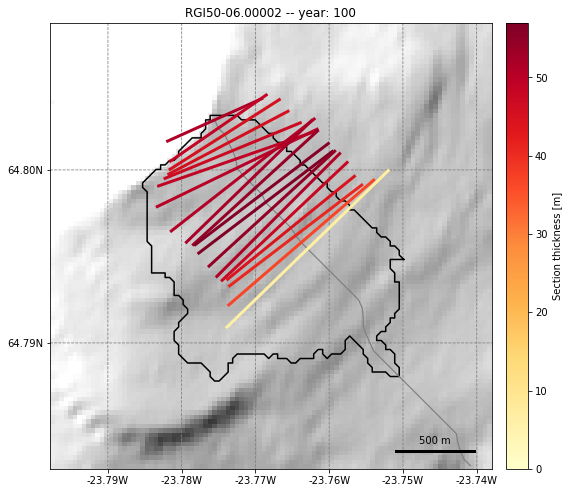

In [29]:
graphics.plot_modeloutput_map(gdirs[glacier_num], model=commit_model)